<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Посмотрим на основные статистические характеристики данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

что можно сказать о данных? данные разделены знаком "\t", 22 столбца с различными типами данных, есть пропуски.
Далее расмотрим внимательно пропуски, решим как из заменять, проверим датасет на дубкаты, аномалии и выбросы. В названиях колонок отсутсвуют пробелы, и выглядят они достаточно читаемыми и понятными. столбец "first_day_exposition" временной, в ходе предобработки данных будем менять его тип. Так же есть некоторые переменные, которые типа "флоат", я бы перевела в "инт", например: количество этажей в доме, или этаж объекта, количество дней и т.д. Так же видим, из описательной таблицы, что есть некие выбросы(высота потолка 100 метров, или 19 комнат)

## Предобработка данных

Начинаем с пропусков и изменения типов данных

In [7]:
df.isna().sum() #смотрим где пусто

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

+ceiling_height           9195 - высота потолков, думаю, что можно будет заменять медианой по 
+floors_total               86 - количество этажей, пропусков достаточно мало, поэтому можно и удалить.
+living_area              1903 - жилая площадь, можно заменить на среднее значение по группе (группировать будем по количесву комнат)
+is_apartment            20924 - это булевая колока и тут пропусков больше всего, посмотрим соотношения "да" и "нет", и от этого уже будет решать, у меня есть предположения, что все отсутсвующие пропуски - это "нет"
+kitchen_area             2278 - площад кухни - заменим на среднее или медианное значение по группам
+balcony                 11519 - балкона скорее всего просто нет.
+locality_name              49 - отсутсвует названи. их мало, это можно удалить

airports_nearest         5542 - все 6 показателей снизу указывают на распоженность того или иного объекта. есть идея заполнить медианными значчениями по группам(группировка по населенному пункту) логично же что в одном поселке аэропорт плюс минус на одинаковом расстоянии)
cityCenters_nearest      5519 - UPD: идея по замене пропусков по группировке по городам немного провалилась от слова совсем)
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589

days_exposition          3181 - пока оставим пропуски.

Удаляем/заменяем пропуски

In [8]:
# перевод формата в 'int'
for column in df[['balcony', 'floors_total', 'days_exposition', 
    'airports_nearest' , 'cityCenters_nearest', 
    'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']]:
    df[column] = df[column].astype('int', errors='ignore')

# перевод 'is_apartment' в 'bool'

df.loc[df['is_apartment'] !=True, 'is_apartment'] = False
df['is_apartment'] = df['is_apartment'].astype(bool)

# перевод 'first_day_exposition' в 'datetime'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [9]:
# удалем пропущенные значения в 'floors_total' и  'locality_name'
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [11]:
#заменяем пропущенные значения высоты потолка
height_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(height_median)

Заполнение такого числа пропусков в высоте потолков одним значением может исказить структуру данного столбца. Слишком много пропусков у нас в данном параметре. Подумай, на основании какого параметра лучше будет обработать данный столбец. Строительство, в основном, типовое, поэтому одинаковые дома обладают схожими характеристиками. Однако ввиду малой дисперсии в данном параметре, мы можем использовать такой способ обработки пропусков.

In [12]:
#заменяем пустые балконы на 0
df['balcony'] = df['balcony'].fillna(0)

In [13]:
#группируем датафрейм по комнтатам по медианам жилой площади
df_grouped_rooms = df.groupby('rooms')['living_area'].transform('median')

In [14]:
df_grouped_rooms

0        45.0
1        17.6
2        30.5
3        45.0
4        30.5
         ... 
23560    45.0
23561    45.0
23562    30.5
23563    30.5
23564    17.6
Name: living_area, Length: 23565, dtype: float64

In [15]:
df['living_area'] = df['living_area'].fillna(df_grouped_rooms)

In [16]:
df.isna().sum() # видим что пропуски уменьшаются, проделаем тоже самое с площадью кухни

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [17]:
#группируем датафрейм по комнтатам по медианам кухонной площади
df_grouped_rooms_kitch = df.groupby('rooms')['kitchen_area'].median()
df_grouped_rooms_kitch

rooms
0        NaN
1       9.00
2       8.70
3       9.50
4      11.00
5      15.10
6      19.75
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna(df_grouped_rooms_kitch)
#не удалились"наны" где 0 комнат, в квартире, очевидно - это студии, заменим их на площадь кухни одной комнаты
s_zero_room = 9.544076
df['kitchen_area'] = df['kitchen_area'].fillna(s_zero_room)

In [19]:
df.isna().sum() #проверяем, с площадями справились двигаемся дальше

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Разберемся с населенными пунктами

In [20]:
# названия переводим в нижний регистр
df['locality_name'] = df['locality_name'].str.lower()
# в слове 'поселок' прыгает буква е = ё
# заменим на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)


#смотрим
df['locality_name'].unique().tolist()


['санкт-петербург',
 'поселок шушары',
 'городской поселок янино-1',
 'поселок парголово',
 'поселок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'деревня федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'поселок металлострой',
 'поселок городского типа лебяжье',
 'поселок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'поселок аннино',
 'поселок городского типа ефимовский',
 'поселок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'поселок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'поселок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 'мурино',
 'шлиссель

In [21]:
# Проверим какие населенные пункты с наиболишим числом объявлений
print('Число значений:', df['locality_name'].value_counts().shape[0])
df['locality_name'].value_counts()[:15]

Число значений: 330


санкт-петербург            15651
поселок мурино               552
поселок шушары               439
всеволожск                   398
пушкин                       369
колпино                      338
поселок парголово            327
гатчина                      307
деревня кудрово              299
выборг                       237
петергоф                     201
сестрорецк                   183
красное село                 176
кудрово                      171
деревня новое девяткино      143
Name: locality_name, dtype: int64

In [22]:
# В отдельных записях указан тип населенного пункта, а каких-то - нет. Проверяем на предмет совпадений и выявляем крупные.

# создание таблицы названий населенных пунктов df_locality_name
df_locality_name = pd.DataFrame(df['locality_name'].value_counts())
df_locality_name.set_axis(['count'], axis='columns', inplace=True)
df_locality_name['locality_name'] = df_locality_name.index
df_locality_name.index = range(len(df_locality_name.index))

# создание столбца с кортокими названиями по последнему слову
short_locality_name = []
for vol in df_locality_name['locality_name']:
    word = vol.split()
    short_locality_name.append(*word[-1:])
df_locality_name['short_locality_name'] = short_locality_name

# создание столбца с логическим типом (встречается название один или несколько раз)
multy_locality = []
for vol in df_locality_name['short_locality_name']:
    if vol in df_locality_name['short_locality_name'].value_counts()[lambda x: x>= 2].index:
        multy_locality.append(True)
    else:
        multy_locality.append(False)
df_locality_name['multy_locality']  = multy_locality


# создание списка для вывода по условиям: название нас. пункта встречаются несколько раз, число объявлений больше 50  
dict_name = (
     df_locality_name
     .loc[(df_locality_name['multy_locality'] == True) & (df_locality_name['count'] > 50)] 
     .pivot_table(index=['short_locality_name','locality_name'] , values='count', aggfunc=('sum'))
     .index.levels[0]
)

# итоговая таблица с названиями нас. пунктов, которые встречаются в разных вариациях:
(df_locality_name
    .query('short_locality_name in @dict_name')
    .pivot_table(index=['short_locality_name','locality_name'] , values='count', aggfunc=('sum'))
)

count
short_locality_name locality_name                             
бор                 деревня бор                              2
                    деревня трубников бор                    1
                    деревня чудской бор                      1
                    поселок городского типа красный бор      8
                    поселок пансионат зеленый бор            2
                    сосновый бор                            87
кудрово             деревня кудрово                        299
                    кудрово                                171
мурино              мурино                                  34
                    поселок мурино                         552
никольское          никольское                              93
                    село никольское                          1

In [23]:
# 'locality_name' - объединяем записи с названиями нас. пунктов Кудрово и Мурино.
df['locality_name'].replace(['кудрово', 'мурино'], ['деревня кудрово', 'поселок мурино'], inplace=True)
    
# проверка результата:
print('Число значений:', df['locality_name'].value_counts().shape[0])
df['locality_name'].value_counts()[:10]

Число значений: 328


санкт-петербург      15651
поселок мурино         586
деревня кудрово        470
поселок шушары         439
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
выборг                 237
Name: locality_name, dtype: int64

In [24]:
# проверяем даиасет на явные дубликаты
df.duplicated().sum() #явных дубликатов нет - ура

0

In [25]:
# у нас есть некие аномалии с высотой потолков(максимальная высота было 100 метров. для жилой недвижимости - это как черезчур много)
df_height_10 = df.loc[df.loc[:,'ceiling_height'] > 10]
print('Количество аномальных строк:', df_height_10.shape[0])
print('аномальные потолки, размеров:', *df_height_10['ceiling_height'].unique(), sep = ', ')

Количество аномальных строк: 25
аномальные потолки, размеров:, 25.0, 32.0, 27.0, 24.0, 26.0, 14.0, 20.0, 22.6, 27.5, 10.3, 100.0


In [26]:
#заменяем аномалии на медианы
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = height_median
#проверяем результат:
print(df['ceiling_height'].max())
# 8 метров - вполне реально для дорого загородного дома :)

8.3


In [27]:
# есть еще одна аномалька - это последняя стоимость квартиры - 12190. сейчас разберемся. отсортируем таблицу по возрастанию по столбцу last_price

df_price = df.sort_values(by = 'last_price')
display(df_price.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8750,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.500000,0.0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17359,7,430000.0,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,...,6.000000,0.0,сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14825,5,430000.0,54.0,2018-06-26,2,2.65,3.0,30.5,3,False,...,9.544076,0.0,поселок станции свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16185,18,440000.0,40.0,2018-07-10,1,2.65,5.0,17.6,1,False,...,9.544076,0.0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9535,7,450000.0,43.4,2018-08-31,2,2.65,5.0,30.3,3,False,...,5.500000,0.0,деревня старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0


In [28]:
# видим, единственную строчку с таким аномально маленьким значением. Скорее всего забили дописать пару нулей. предлагаю эту ячейку просто домножить на 100
df.loc[df['last_price'] == 12190.0, 'last_price'] = 1219000.0

In [29]:
# проверем аномальные выбросы:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.000000e+00,14.00,50.0
last_price,23565.0,6.540109e+06,1.091091e+07,430000.0,3400000.0,4.646000e+06,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,5.200000e+01,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.000000e+00,3.00,19.0
ceiling_height,23565.0,2.697662e+00,2.326561e-01,1.0,2.6,2.650000e+00,2.70,8.3
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.000000e+00,16.00,60.0
living_area,23565.0,3.432490e+01,2.172201e+01,2.0,18.4,3.030000e+01,42.70,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.000000e+00,8.00,33.0
kitchen_area,23565.0,1.046510e+01,5.623397e+00,1.3,7.3,9.544076e+00,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.000000e+00,1.00,5.0


Выводы по предобработке данных:
избавлись от большого количесва "нанов", привели названия населенных пунктов в порядок - привели в единый регистр и заменили Ё на Е, соеденили одинаковые названия ("дереня М" и просто "М"), избавились от аномалий. можно двигаться дальше!

## Расчёты и добавление результатов в таблицу

In [30]:
#  расчет стоимости квадратного метра 
df['price_sqm'] = df['last_price'] / df['total_area']

# год, месяц и день недели размещения объявления
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday

# 'floor_level' - этаж квартиры, категории : первый, последний, другой
def floor_level(row):
    try:
        if row['floor'] == 1:
            return('первый')
        elif row['floor'] == row['floors_total']:
            return('последний')
        else:
            return('другой')
    except:
        return('NaN')
df['floor_level'] = df.apply(lambda row: floor_level(row), axis=1)    


# отношение площади жилой к общей 
df['proportion_living'] = df['living_area'] / df['total_area']

# отношение площади кухни к общей 
df['proportion_kitchen'] = df['kitchen_area'] / df['total_area']

# проверка результата
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sqm,year,month,weekday,floor_level,proportion_living,proportion_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000


все появилось

## Исследовательский анализ данных

Изучим параметры: площадь, цена, число комнат, высота потолков. Автоматизируем построение гистограмм для каждого параметра. Посмотрим, как выглядят диаграммы размаха для изученных данных и избавимся от выбросов.

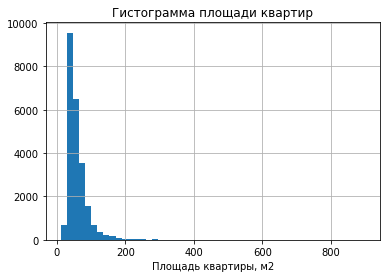

In [31]:
#строим гистограмму площаи квартир
df['total_area'].hist(bins=50)
plt.title('Гистограмма площади квартир')
plt.xlabel('Площадь квартиры, м2')
plt.show()

По пикам видим, что большая чать квартир это 35-45 метров и 45-65 метров, далее идет заметный спад

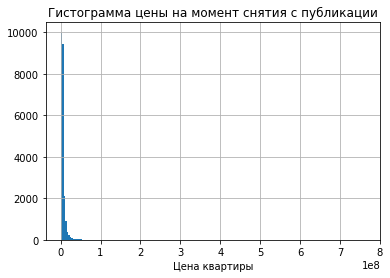

In [32]:
df['last_price'].hist(bins=200)
plt.title('Гистограмма цены на момент снятия с публикации')
plt.xlabel('Цена квартиры')
plt.show()

In [33]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540109e+06
std      1.091091e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [34]:
df.loc[df['last_price']>15000000]['last_price'].count()

1195

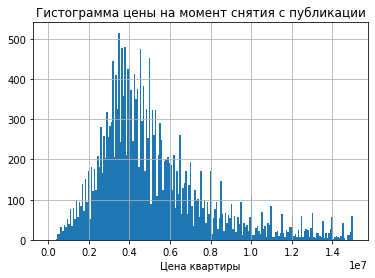

In [35]:
df['last_price'].hist(bins=200, range=(0,15000000))
plt.title('Гистограмма цены на момент снятия с публикации')
plt.xlabel('Цена квартиры')
plt.show()

пики на уровне 3-5 млн

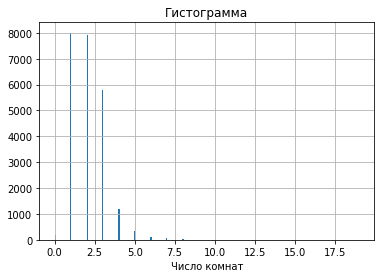

In [36]:
#построим гистограму с количеством комнат
df['rooms'].hist(bins=200)
plt.title('Гистограмма')
plt.xlabel('Число комнат')
plt.show()

самые популярные помещения с 1-2-3 комнатами

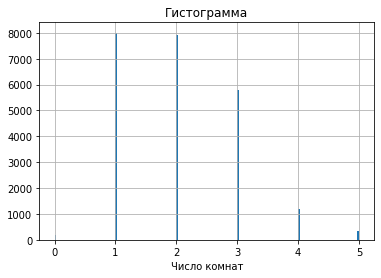

In [37]:
#увеличим график и посмотрим на комнаты 
df['rooms'].hist(bins=200, range = (0,5))
plt.title('Гистограмма')
plt.xlabel('Число комнат')
plt.show()

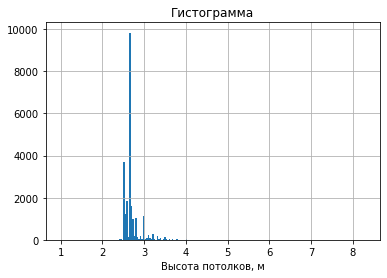

In [38]:
df['ceiling_height'].hist(bins=200)
plt.title('Гистограмма')
plt.xlabel('Высота потолков, м')
plt.show()

видим, что большинство объектов с потолками 2.5-3 метра

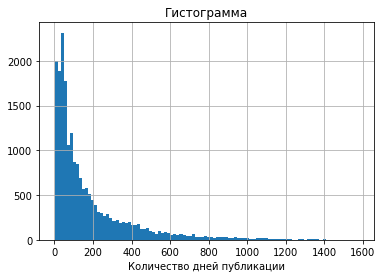

In [39]:
df['days_exposition'].hist(bins=100)
plt.title('Гистограмма')
plt.xlabel('Количество дней публикации')
plt.show()

In [40]:
#создадим отдельную таблицу со среднем временем продажи по каждрму пункту
df_expos=df.pivot_table(index='locality_name', values='days_exposition',aggfunc=['count','mean'])

In [41]:
# посмотрим на первые 10
df_expos.columns=['count','mean']
df_expos.sort_values(by='count',ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,13577,182.726965
поселок мурино,547,149.208410
деревня кудрово,439,159.826879
поселок шушары,407,156.429975
всеволожск,339,197.085546
колпино,308,143.600649
пушкин,307,209.579805
поселок парголово,302,155.503311
гатчина,268,189.619403


In [42]:
df['days_exposition'].describe() #посмотрим на статистические данные: медиану и среднее

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

среднее больше медианы в два раза, посмотрим выбросы:

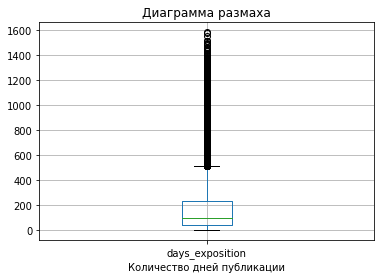

In [43]:
df.boxplot(column='days_exposition')
plt.title('Диаграмма размаха')
plt.xlabel('Количество дней публикации')
plt.show()

видим, очевидные выбросы до 1600 дней, большая чать лежит в диапазоне 200 дней
будем считать что "очень быстро" это до 45 дней (Q1), а "необычно долго" - более 198 дней (Q3)
продажа обычно занимает 95 дня (медиана)

In [44]:
#посмотрим на количество строк "выброса"
print('количество объявлений, которые висят более 600 дней:', df.loc[df['days_exposition']>600]['days_exposition'].count())


количество объявлений, которые висят более 600 дней: 1193


думаю, что этот выброс можно обрезать, скорее всего объявления не рентабельные, а может не фотографий и тд.

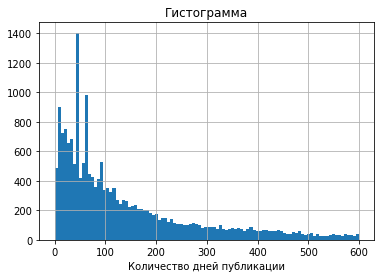

In [45]:
#обрежем выбросы и построим гистограмму снова:

df['days_exposition'].hist(bins=100, range = (0,600))
plt.title('Гистограмма')
plt.xlabel('Количество дней публикации')
plt.show()

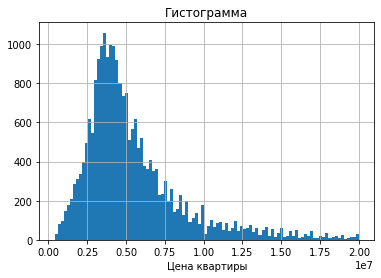

In [46]:
# построим гистограму цены
df['last_price'].hist(bins=100, range = (400000, 20000000))
plt.title('Гистограмма')
plt.xlabel('Цена квартиры')
plt.show()

Данные имеют некие выбросы, уберем их, чтобы получить более правдоподобные результаты

In [47]:
good_df = df.query('days_exposition != 0 and days_exposition < 600') # убираем выбросы по количесву дней
good_df = good_df.query('last_price < 15000000') #убираем выбросы по цене
good_df = good_df.query('rooms <= 5') #убираем выбросы по количеству комнат
good_df = good_df.query('ceiling_height < 4') #убираем выбросы по высоте потолков

In [48]:
# посмотрим что получилось:
good_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,18370.0,9.577082e+00,5.571187e+00,0.000000,6.000000e+00,9.000000e+00,1.300000e+01,5.000000e+01
last_price,18370.0,4.983681e+06,2.538162e+06,430000.000000,3.300000e+06,4.390000e+06,6.000000e+06,1.500000e+07
total_area,18370.0,5.382128e+01,2.068438e+01,12.000000,3.900000e+01,4.900000e+01,6.400000e+01,2.550000e+02
rooms,18370.0,1.923244e+00,9.132965e-01,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
ceiling_height,18370.0,2.671632e+00,1.690919e-01,1.000000,2.600000e+00,2.650000e+00,2.700000e+00,3.980000e+00
floors_total,18370.0,1.100969e+01,6.704337e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,18370.0,3.069337e+01,1.414885e+01,2.000000,1.800000e+01,2.940000e+01,3.940000e+01,1.600000e+02
floor,18370.0,6.016222e+00,4.961308e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,18370.0,9.760709e+00,3.900811e+00,2.000000,7.100000e+00,9.500000e+00,1.100000e+01,1.007000e+02
balcony,18370.0,6.007621e-01,9.453460e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


In [49]:
good_df.info() # датафрейм немного уменьшился, но зато у нас более менее чистые данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18370 entries, 1 to 23561
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18370 non-null  int64         
 1   last_price            18370 non-null  float64       
 2   total_area            18370 non-null  float64       
 3   first_day_exposition  18370 non-null  datetime64[ns]
 4   rooms                 18370 non-null  int64         
 5   ceiling_height        18370 non-null  float64       
 6   floors_total          18370 non-null  float64       
 7   living_area           18370 non-null  float64       
 8   floor                 18370 non-null  int64         
 9   is_apartment          18370 non-null  bool          
 10  studio                18370 non-null  bool          
 11  open_plan             18370 non-null  bool          
 12  kitchen_area          18370 non-null  float64       
 13  balcony         

In [101]:
print('На сколько уменьшился датафрейм:{:.2%}'.format((23699 - 18370)/23699 ))

На сколько уменьшился датафрейм:22.49%


Какие факторы больше всего влияют на стоимость квартиры? зависит ли цена от площади, числа комнат, удалённости от центра. зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также рассмотрим зависимость от даты размещения: дня недели, месяца и года.

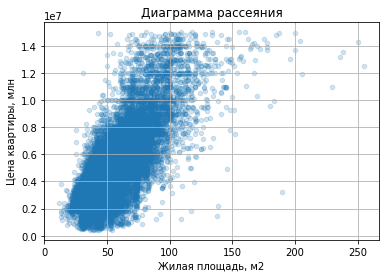

In [50]:
# построим диаграмму рассеивания, чтобы найти зависимость цены от площади
good_df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, grid=True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [51]:
# проверим коэффициент пирсона
good_df['total_area'].corr(good_df['last_price'])

0.7442010693040655

видим достаточно сильную связь, посколько на цену влияют еще и другие факторы - это зависимость достаточно сильная

Посмотрим на связь цены и количества комнат!

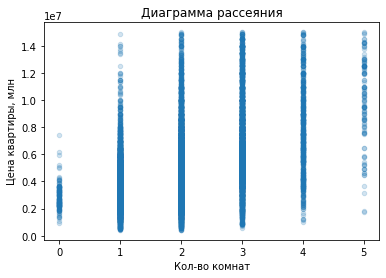

In [80]:
# построим диаграмму рассеивания, чтобы найти зависимость цены от кол-ва комнат
good_df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [53]:
# проверим коэффициент пирсона
good_df['rooms'].corr(good_df['last_price'])

0.4861683731793956

связь есть, но не такая сильная как площадь

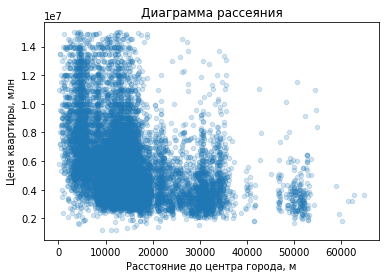

In [54]:
# построим диаграмму рассеивания, чтобы найти зависимость цены от расстояния до центра
good_df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [55]:
# проверим коэффициент пирсона
good_df['cityCenters_nearest'].corr(good_df['last_price'])

-0.3495257747482515

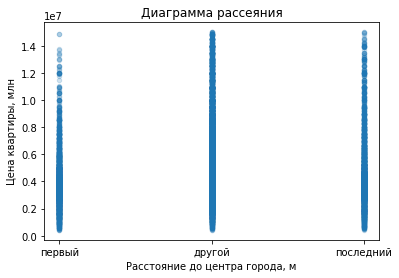

In [56]:
# построим диаграмму рассеивания, чтобы найти зависимость цены от этажа
good_df.plot(x='floor_level', y='last_price', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Цена квартиры, млн')
plt.show()

цены на первый и последний этаж более низкие, чем на остальные

Посмотрим как зависит цена от времени публикации объявления

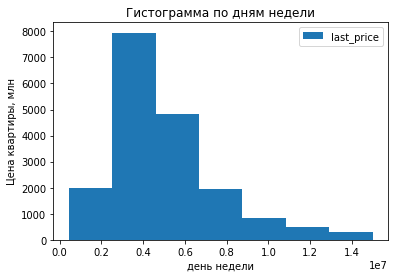

In [57]:
good_df.plot(x='weekday', y='last_price', kind='hist', bins = 7)
plt.title('Гистограмма по дням недели')
plt.xlabel('день недели')
plt.ylabel('Цена квартиры, млн')
plt.show()

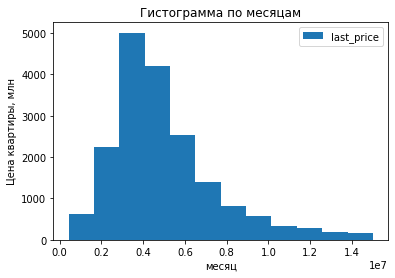

In [58]:
good_df.plot(x='month', y='last_price', kind='hist', bins = 12)
plt.title('Гистограмма по месяцам')
plt.xlabel('месяц')
plt.ylabel('Цена квартиры, млн')
plt.show()

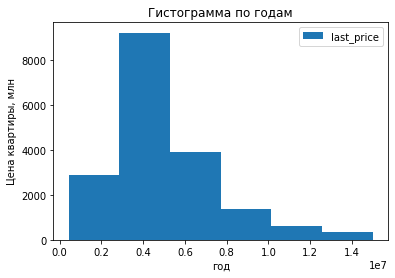

In [59]:
good_df.plot(x='year', y='last_price', kind='hist', bins = 6)
plt.title('Гистограмма по годам')
plt.xlabel('год')
plt.ylabel('Цена квартиры, млн')
plt.show()

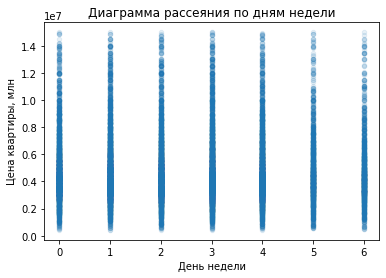

In [81]:
# построим диаграмму рассеивания, чтобы найти зависимость цены от дня недели
good_df.plot(x='weekday', y='last_price', kind='scatter', alpha=0.1)
plt.title('Диаграмма рассеяния по дням недели')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [82]:
# проверим коэффициент пирсона
good_df['weekday'].corr(good_df['last_price'])

-0.0074565319668040775

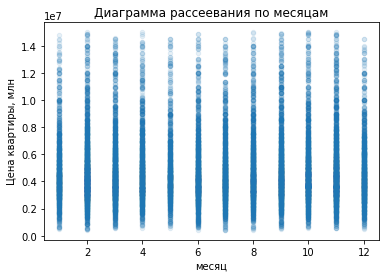

In [77]:
good_df.plot(x='month', y='last_price', kind='scatter', alpha = 0.1)
plt.title('Диаграмма рассеевания по месяцам')
plt.xlabel('месяц')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [83]:
# проверим коэффициент пирсона
good_df['month'].corr(good_df['last_price'])

0.006069678158913133

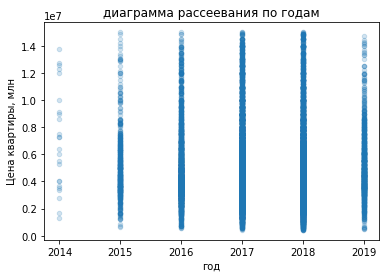

In [73]:
good_df.plot(x='year', y='last_price', kind='scatter', alpha = 0.2)
plt.title('диаграмма рассеевания по годам')
plt.xlabel('год')
plt.ylabel('Цена квартиры, млн')
plt.show()

In [84]:
# проверим коэффициент пирсона
good_df['year'].corr(good_df['last_price'])

-0.013461486930213573

переделав графики и посчитав корреляцию пирсона, могу сделать выводы, что сезонность объявлений не влияет на цену объектов. Влияет год размещения, так как изменяется общее положение рынка недвижимости.

Хорошо покупают со вторника по пятницам, начиная с марта. по годам хороший был 15 и 16 год

10 населённых пунктов с наибольшим числом объявлений. средняя цена квадратного метра в этих населённых пунктах. населённые пункты с самой высокой и низкой стоимостью жилья. 

In [86]:
#выведем топ-10 населённых пунктов с наибольшим числом объявлений и средней ценой квадратного метра
df_price_m2=good_df.pivot_table(index='locality_name', values='price_sqm',aggfunc=['count','mean'])
df_price_m2.columns=['count','mean']
df_10 = df_price_m2.sort_values(by='count',ascending=False).head(10)
df_10

,count,mean
locality_name,,
санкт-петербург,11949,105679.107197
поселок мурино,527,85826.461899
деревня кудрово,415,94587.041312
поселок шушары,393,77826.448326
всеволожск,315,66697.807026
колпино,298,74607.410293
поселок парголово,292,89472.350768
пушкин,273,99702.958801
гатчина,250,68126.394821


In [87]:
#выведем топ 10 по средней цене
df_10.sort_values(by='mean',ascending=False)

,count,mean
locality_name,,
санкт-петербург,11949,105679.107197
пушкин,273,99702.958801
деревня кудрово,415,94587.041312
поселок парголово,292,89472.350768
поселок мурино,527,85826.461899
поселок шушары,393,77826.448326
колпино,298,74607.410293
гатчина,250,68126.394821
всеволожск,315,66697.807026


In [88]:
#населенный пункт с самой высокой средней ценой

df_10.loc[df_10['mean'] == df_10['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,11949,105679.107197


In [89]:
#населенный пункт с самой низкой средней ценой

df_10.loc[df_10['mean'] == df_10['mean'].min()]

,count,mean
locality_name,,
выборг,194,57079.652792


In [90]:
df_sp = good_df.query('locality_name == "санкт-петербург"').reset_index(drop=True)
#Создадим столбец с расстоянием до центра в километрах и округлим до целых

df_sp['distance_km'] = df_sp['cityCenters_nearest']//1000
df_sp['distance_km']

0        13.0
1         8.0
2        15.0
3        13.0
4        14.0
         ... 
11944    16.0
11945    14.0
11946    16.0
11947     6.0
11948     4.0
Name: distance_km, Length: 11949, dtype: float64

In [91]:
#сгруппируем по дистанции и посчитаем кол-во объявлений

df_sp.groupby('distance_km')['distance_km'].count()

distance_km
0.0       43
1.0      107
2.0      172
3.0      312
4.0      518
5.0      446
6.0      294
7.0      273
8.0      482
9.0      552
10.0     735
11.0    1158
12.0    1270
13.0    1170
14.0    1255
15.0    1132
16.0     928
17.0     410
18.0     149
19.0      72
20.0      59
21.0     165
22.0     106
23.0      22
24.0      22
25.0      64
26.0       3
27.0       2
28.0       9
29.0       2
Name: distance_km, dtype: int64

In [92]:
#посчитаем среднюю цену квадратного метра для каждого расстояния

df_sp.pivot_table(index='distance_km', values='price_sqm')

,price_sqm
distance_km,
0.0,121399.639650
1.0,121897.034677
2.0,114244.086656
3.0,111512.093042
4.0,121567.155048
5.0,120652.347556
6.0,121012.810593
7.0,120230.408831
8.0,113191.114021


Text(0, 0.5, 'цена квадратного метра')

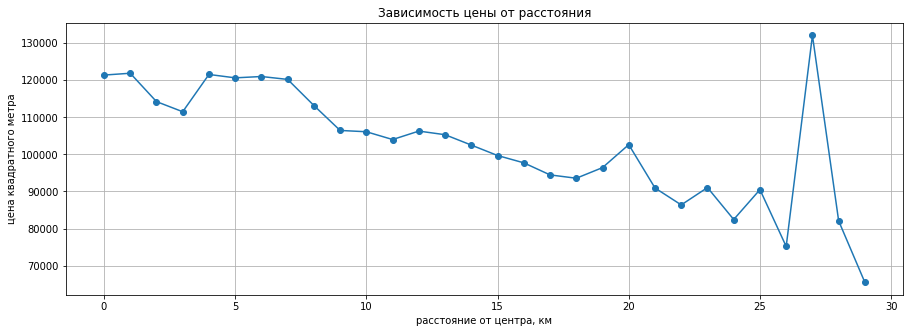

In [93]:
(
    df_sp.pivot_table(index='distance_km', values='price_sqm')
    .plot(
        grid=True,
        figsize=(15,5),
        style='o-',
        title='Зависимость цены от расстояния',
        legend=False)
)
plt.xlabel('расстояние от центра, км')
plt.ylabel('цена квадратного метра')

подведем итого по этой задаче: цены в центре дороже, по графику можно сказать, центральный район будет считаться 8 километров от центра, дольше цены снижаются, но есть один выброс в радиусе 27 км

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [94]:
# выделим сегмент в центре
df_spb_center = df_sp.query('distance_km <= 8')
# оставим только нужные столбцы для изучения данных
need_to_describe_fields = ['total_area', 'last_price', 'rooms', 'ceiling_height']
df_sp[need_to_describe_fields].join(df_spb_center[need_to_describe_fields], rsuffix='_center').describe()

,total_area,last_price,rooms,ceiling_height,total_area_center,last_price_center,rooms_center,ceiling_height_center
count,11949.000000,1.194900e+04,11949.000000,11949.000000,2647.000000,2.647000e+03,2647.000000,2647.000000
mean,55.791651,5.834679e+06,1.982342,2.688380,67.219290,7.660707e+06,2.320363,2.838659
std,21.776072,2.532653e+06,0.938040,0.188698,26.413347,2.880459e+06,1.025070,0.287328
min,12.000000,1.190000e+06,0.000000,1.000000,12.000000,1.600000e+06,0.000000,2.400000
25%,40.000000,4.000000e+06,1.000000,2.600000,46.400000,5.492500e+06,2.000000,2.650000
50%,50.500000,5.100000e+06,2.000000,2.650000,64.000000,7.203654e+06,2.000000,2.680000
75%,67.000000,6.950000e+06,3.000000,2.700000,83.000000,9.500000e+06,3.000000,3.000000
max,255.000000,1.500000e+07,5.000000,3.980000,255.000000,1.499000e+07,5.000000,3.980000


По таблице хорошо видно, что по параметрам комнат и высоты потолков, квартиры в центре почти не отличаются от выборки по всему городу. И даже максимум по числу комнат остается за общей выборкой. Однако цена и общая площадь квартир в центре выше.
Посмотрим на графики, сравним факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

array([[<AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='distance_km', ylabel='rooms'>,
        <AxesSubplot:xlabel='year', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>],
       [<AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='distance_km', ylabel='floor'>,
        <AxesSubplot:xlabel='year', ylabel='floor'>,
        <AxesSubplot:xlabel='last_price', ylabel='floor'>],
       [<AxesSubplot:xlabel='rooms', ylabel='distance_km'>,
        <AxesSubplot:xlabel='floor', ylabel='distance_km'>,
        <AxesSubplot:xlabel='distance_km', ylabel='distance_km'>,
        <AxesSubplot:xlabel='year', ylabel='distance_km'>,
        <AxesSubplot:xlabel='last_price', ylabel='distance_km'>],
       [<AxesSubplot:xlabel='rooms', ylabel='year'>,
        <AxesSubplot:xlabel='floor', ylabel='year'>,
        <AxesSubplot:

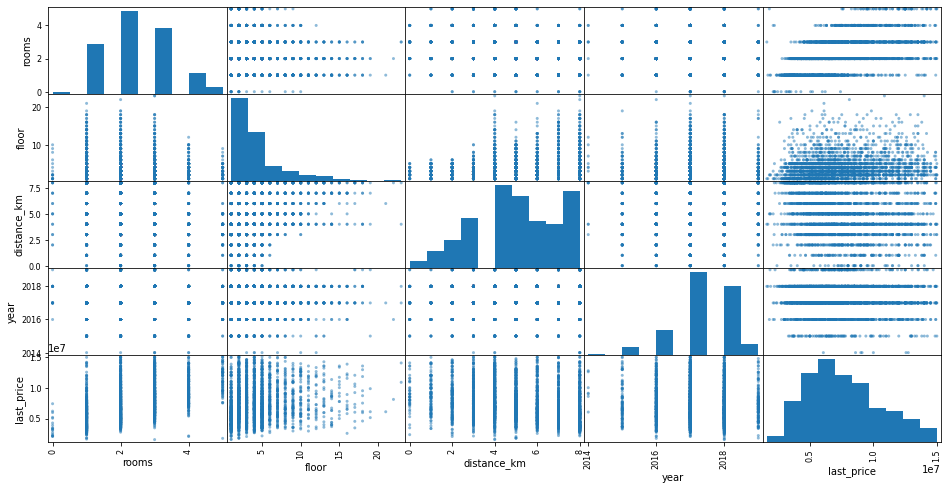

In [95]:
# оставим только нужные столбцы для построения графиков
df_spb_center_only_needed = df_spb_center[['rooms', 'floor', 'distance_km', 'year', 'last_price']]
df_spb_only_needed = df_sp[['rooms', 'floor', 'distance_km', 'year', 'last_price']]

# построим графики
pd.plotting.scatter_matrix(df_spb_center_only_needed, figsize=(16,8))

array([[<AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='distance_km', ylabel='rooms'>,
        <AxesSubplot:xlabel='year', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>],
       [<AxesSubplot:xlabel='rooms', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='distance_km', ylabel='floor'>,
        <AxesSubplot:xlabel='year', ylabel='floor'>,
        <AxesSubplot:xlabel='last_price', ylabel='floor'>],
       [<AxesSubplot:xlabel='rooms', ylabel='distance_km'>,
        <AxesSubplot:xlabel='floor', ylabel='distance_km'>,
        <AxesSubplot:xlabel='distance_km', ylabel='distance_km'>,
        <AxesSubplot:xlabel='year', ylabel='distance_km'>,
        <AxesSubplot:xlabel='last_price', ylabel='distance_km'>],
       [<AxesSubplot:xlabel='rooms', ylabel='year'>,
        <AxesSubplot:xlabel='floor', ylabel='year'>,
        <AxesSubplot:

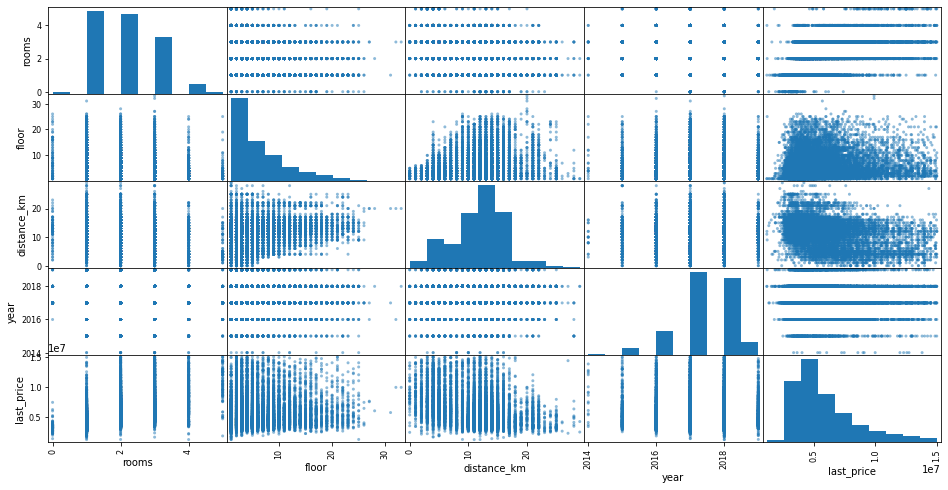

In [96]:
# Построим графики для всего города
pd.plotting.scatter_matrix(df_spb_only_needed, figsize=(16,8))

Чем ближе квартира к центру, тем на меньшем этаже она предлагается. 
Квартиры в центре чаще имеют несколько комнат, чем предложения по всему городу. Однокомнатных квартир гораздо меньше.
Остальные параметры в среднем сопоставимы с квартирами в центре.

In [97]:
# проверим коэффициент пирсона цены и параметров квартиры
print(df_spb_only_needed.corr())

                rooms     floor  distance_km      year  last_price
rooms        1.000000 -0.181720    -0.196960 -0.064019    0.540794
floor       -0.181720  1.000000     0.213647  0.010286    0.052971
distance_km -0.196960  0.213647     1.000000  0.045175   -0.374643
year        -0.064019  0.010286     0.045175  1.000000   -0.005293
last_price   0.540794  0.052971    -0.374643 -0.005293    1.000000


по табличке выше можем обратить внимание, что цена объкта сильно зависит от количесва комнат, расположения от центра города

## Общий вывод

Был проведен досточно глубокий анализ недвижимости в СПБ. Первым этам провели данные в порядок - заполнили пропуски, изменили типы данных. Далее мы добавили дополнительные вспомогательные признаки(стоимоть метра, год размещенмя, классифицировали этажи)

Разобрали как каждый параметр влият на цену:
Город, в котором находится квартира, тут разница может быть просто колоссальной
Площадь
Количество комнат
Расстояние до центра
Квартира на любом этаже кроме первого стоит дороже всего. Следом идет последний этаж,потом первый.

Выяснено, что продать "очень быстро" - это до 45 дней, а "необычно долго" - более 198 дней, продажа обычно занимает 95 дня.


# Общий вывод:

Что можно сказать о данных? данные разделены знаком "\t", 22 столбца с различными типами данных, были пропуски.
Обработали данные на предмет дубкатов, аномалий и выбросов. Поменяли типы данных с "флоат" на "инт" там где это было нужно, заполнили пропуски.
В ходе удаления выбросов, пропусков и дубликтов датасет уменьшился на 22 процента
Произведено добавление необходимых для дальнейшего исследования параметров.

Изучили параметры: площадь, цена, число комнат, высота потолков. Большая чать квартир это 35-45 метров и 45-65 метров. Самые популярные планировки - это 1, 2 и 3 комнатные квартиры с потолками 2,5 - 3 метра. 

Скорость продажи объектов - "очень быстро" это до 45 дней, а "необычно долго" - более 198 дней, в среднем продажа обычно занимает 95 днея со дня публикации.

10 населённых пунктов с наибольшим числом объявлений. средняя цена квадратного метра в этих населённых пунктах. населённые пункты с самой высокой и низкой стоимостью жилья.

мы нашли топ-10 населённых пунктов с наибольшим числом объявлений и средней ценой квадратного метра
		
санкт-петербург	105679.107197 цена за кв.метр

поселок мурино	85826.461899 цена за кв.метр

деревня кудрово	94587.041312 цена за кв.метр

поселок шушары	77826.448326 цена за кв.метр

всеволожск	66697.807026 цена за кв.метр

колпино 74607.410293 цена за кв.метр

поселок парголово 89472.350768 цена за кв.метр

пушкин	99702.958801 цена за кв.метр

гатчина	68126.394821 цена за кв.метр

выборг	57079.652792 цена за кв.метр

Цены зависят сильно от населенного пункта.




Зависимость цены от параметров квартир в СПБ: цена объектов очень сильно зависит от количества комнат, этажа и растояния до центра города.
По таблице хорошо видно, что по параметрам комнат и высоты потолков, квартиры в центре почти не отличаются от выборки по всему городу. И даже максимум по числу комнат остается за общей выборкой. Однако цена и общая площадь квартир в центре выше. Посмотрим на графики, сравним факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод